<a href="https://colab.research.google.com/github/Amogh-SK/RailwayPlatformTicketGenerator/blob/main/PlatformTicketGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qrcode[pil]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 680.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.9 MB/s eta 0:00:00


In [2]:
import qrcode
import datetime
import uuid
from IPython.display import Image, display
from ipywidgets import widgets
from datetime import datetime, timedelta
import uuid
from dateutil.tz import gettz

Enter your name: Amogh SK
Please make a paymet of rupees 20 and choose your Railway Station


Dropdown(description='Station:', options=('None', 'Bangalore City Railway Station(Majestic)', 'Bangalore Canto…

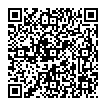

Ticket ID: 9a94c66c
User: Amogh SK
Station: Yeshvantpur Junction Railway Station
Price: 20
Purchase Time: 18:50
Expiration Time: 20:50


In [3]:
def generate_platform_ticket(user_name, station, price=20, expiration_time_hours=2):
    ticket_id = str(uuid.uuid4())[:8]
    current_time = datetime.now(tz=gettz('Asia/Kolkata'))
    expiration_time = current_time + timedelta(hours=expiration_time_hours)

    ticket_data = {
        "ticket_id": ticket_id,
        "user_name": user_name,
        "station": station,
        "price": price,
        "purchase_time": current_time.strftime('%H:%M'),  # Format time as HH:MM
        "expiration_time": expiration_time.strftime('%H:%M'),  # Format time as HH:MM
    }

    return ticket_data

def generate_qr_code(ticket_data):
    formatted_details = "\n".join([f"{key}: {value}" for key, value in ticket_data.items()])
    markdown_string = f"# Platform Ticket\n{formatted_details}"
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=2,
        border=4,
    )
    qr.add_data(formatted_details)
    qr.make(fit=True)

    qr_code_img = qr.make_image(fill_color="black", back_color="white")
    qr_code_img.save("generated_qr.png")  # Save QR code to a file
    return qr_code_img

def station_dropdown():
    stations = ["None", "Bangalore City Railway Station(Majestic)", "Bangalore Cantonment Railway Station","Yeshvantpur Junction Railway Station","Krishnarajapuram Railway Station"]
    dropdown = widgets.Dropdown(
        options=stations,
        value=stations[0],
        description='Station:',
    )
    return dropdown

def on_station_selected(change):
    station = change['new']
    ticket_data = generate_platform_ticket(user_name, station)
    qr_code_img = generate_qr_code(ticket_data)

    display(Image(filename="generated_qr.png"))
    print("Ticket ID:", ticket_data["ticket_id"])
    print("User:", ticket_data["user_name"])
    print("Station:", ticket_data["station"])
    print("Price:", ticket_data["price"])
    print("Purchase Time:", ticket_data["purchase_time"])
    print("Expiration Time:", ticket_data["expiration_time"])

user_name = input("Enter your name: ")
print("Please make a paymet of rupees 20 and choose your Railway Station")
station_dropdown_widget = station_dropdown()
station_dropdown_widget.observe(on_station_selected, names='value')
display(station_dropdown_widget)
